<img src='images/gesis.png' style='height: 50px; float: left'>
<img src='images/social_comquant.png' style='height: 50px; float: left; margin-left: 40px'>

## Introduction to Computational Social Science methods with Python

# Session 8. Unsupervised machine learning

2-dimensional data paradigm: observations and features (variables)

Well-behaved (dense and balanced) vs. badly-behaved data (sparse, binary, and/or non-linear)

...

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how you can ...
</div>

## 8.1. Dimensionality reduction

https://scikit-learn.org/stable/modules/decomposition.html#decompositions

Hovy textbook chapter 6

### 8.1.1. Structured data

Introduce Principal Component Analysis (PCA) using the VDEM dataset

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

Explain factor analysis and PCA in easy terms

Infer two factors and visualize them

How to interpret the results

Hovy chapter 6.3

caveats re PCA

In [1]:
import pandas as pd

In [2]:
vdem = pd.read_csv('../data/V-Dem/V-Dem-CY-Full+Others-v10.csv', encoding='utf-8', low_memory=False)

In [3]:
vdem = vdem[vdem['year'] == 2019].reset_index(drop=True)

In [4]:
indicators = [
    'v2dlreason', 'v2dlcommon', 'v2dlcountr', 'v2dlconslt', 'v2dlengage', 
    'v2dlencmps', 'v2dlunivl', 'v2cseeorgs', 'v2csreprss', 'v2cscnsult', 
    'v2csprtcpt', 'v2csgender', 'v2csantimv', 'v2csrlgrep', 'v2csrlgcon', 
    'v2mecenefm', 'v2mecenefi', 'v2mecenefibin', 'v2mecrit', 'v2merange', 
    'v2mefemjrn', 'v2meharjrn', 'v2meslfcen', 'v2mebias', 'v2mecorrpt', 
    'v2exrescon', 'v2exbribe', 'v2exembez', 'v2excrptps', 'v2exthftps', 
    'v2cldiscm', 'v2cldiscw', 'v2clacfree', 'v2clrelig', 'v2clfmove'
]

In [5]:
countries = vdem['country_name'].tolist()
vdem = vdem.set_index('country_name')[indicators]
vdem.shape

(179, 35)

Are there missing values?

In [6]:
vdem.isna().sum().value_counts()

0    35
dtype: int64

How are the variables distributed?

In [7]:
vdem.loc[:, ~vdem.columns.isin(['v2mefemjrn'])].mean()

v2dlreason       0.520453
v2dlcommon       0.589011
v2dlcountr       0.519698
v2dlconslt       0.822447
v2dlengage       0.818101
v2dlencmps       0.664698
v2dlunivl        0.754061
v2cseeorgs       0.857916
v2csreprss       0.756944
v2cscnsult       0.676380
v2csprtcpt       0.853888
v2csgender       1.125268
v2csantimv      -0.475732
v2csrlgrep       0.667782
v2csrlgcon       0.363676
v2mecenefm       0.571168
v2mecenefi       0.157726
v2mecenefibin    0.398553
v2mecrit         0.751777
v2merange        0.751933
v2meharjrn       0.573788
v2meslfcen       0.491430
v2mebias         0.751765
v2mecorrpt       0.478017
v2exrescon       0.537268
v2exbribe        0.076687
v2exembez        0.119274
v2excrptps      -0.136648
v2exthftps       0.019134
v2cldiscm        0.837480
v2cldiscw        0.793933
v2clacfree       0.796715
v2clrelig        0.679531
v2clfmove        0.846832
dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set_theme(style='darkgrid')

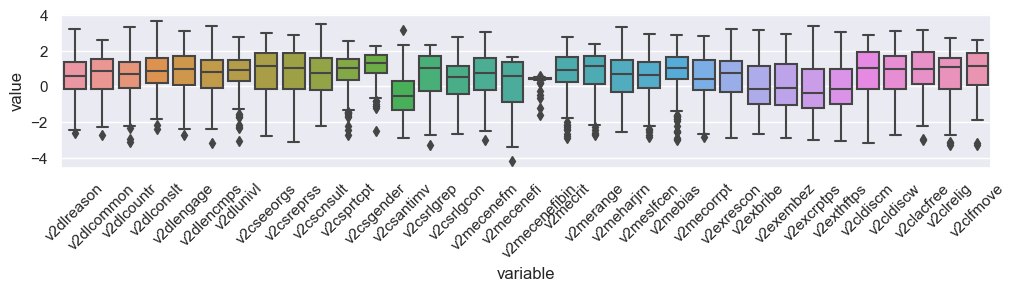

In [10]:
plt.figure(figsize=[12, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem.loc[:, ~vdem.columns.isin(['v2mefemjrn'])].melt()
)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

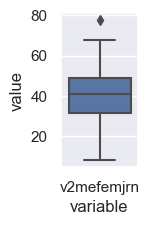

In [11]:
plt.figure(figsize=[1, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem.loc[:, vdem.columns.isin(['v2mefemjrn'])].melt()
)

In [12]:
X_vdem = vdem.to_numpy()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_vdem = StandardScaler().fit_transform(X_vdem)

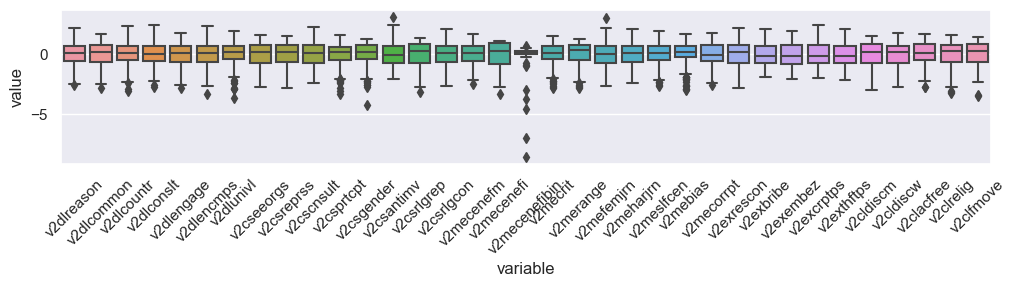

In [15]:
plt.figure(figsize=[12, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = pd.DataFrame(data=X_vdem, columns=indicators).melt()
)
plt.xticks(rotation=45)
plt.show()

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca_vdem = PCA(random_state=42)

In [18]:
X_vdem_pca = pca_vdem.fit_transform(X_vdem)

In [19]:
X_vdem_pca.shape

(179, 35)

In [20]:
vdem_pc = pd.DataFrame(X_vdem_pca, index=countries)
vdem_pc.columns=[f'PC {i}' for i in vdem_pc.columns]
vdem_pc

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,...,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31,PC 32,PC 33,PC 34
Mexico,-1.202027,-0.677605,-1.368239,0.303156,-1.430489,0.911451,0.048631,-0.427252,0.455746,1.393623,...,-0.277330,-0.232740,0.262911,-0.287686,0.443250,0.079864,-0.037155,-0.339040,0.013999,0.354266
Suriname,-2.341024,-0.377533,-0.482024,-0.918079,-0.215817,0.929522,-0.516014,0.740485,-0.287481,0.057980,...,-0.048032,-0.040700,0.001150,0.572153,-0.151856,0.045617,0.012967,0.247743,0.164254,-0.109257
Sweden,-6.869927,1.128137,0.079082,0.317767,0.492971,-0.419354,-0.070675,-1.206362,-1.230085,0.048084,...,-0.027805,0.024394,0.285571,-0.093687,0.372903,-0.150315,-0.220575,-0.012888,-0.178579,-0.341230
Switzerland,-7.507582,1.587825,1.071130,0.880006,-0.766096,-0.223308,-0.136888,0.082895,-0.218734,-0.543413,...,-0.044387,0.177587,0.057451,0.412269,0.662812,0.028931,0.149371,-0.145301,0.024361,-0.078439
Ghana,-2.319518,-1.429725,-0.888167,-0.710036,0.089036,0.320192,-1.549043,1.091807,0.259908,-0.302106,...,-0.497585,0.206129,-0.134344,0.067117,0.542148,0.353516,-0.155180,-0.046933,-0.295825,0.353088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solomon Islands,-1.116092,-1.958971,-0.116526,0.333729,-1.786872,1.471435,-0.008969,-0.344062,-0.586623,-0.327738,...,0.139026,0.280650,0.365161,-0.095326,-0.417537,-0.072066,0.199660,0.079057,0.445452,0.432305
Vanuatu,-3.398636,-1.098114,-0.120277,-0.303111,-0.861445,1.542766,-1.332908,0.680667,-0.788313,-0.337957,...,0.388298,0.540518,-0.002199,0.178680,-0.238574,-0.026182,-0.127045,0.206315,-0.154600,0.129604
United Arab Emirates,5.309095,5.170591,-0.969336,-0.066154,-0.712639,-0.348681,-1.829019,-0.223755,1.516163,-1.395985,...,0.307110,0.165778,0.336355,-0.328485,0.160351,-0.277958,-0.563211,-0.297481,0.415842,-0.003759
Hungary,0.612202,-0.285823,-1.804975,0.155212,0.356634,-1.131312,-0.805295,-0.952790,1.303632,0.778671,...,0.534347,-0.251121,0.168254,0.292364,-0.087452,0.579814,0.044461,-0.132366,0.228506,-0.123566


In [21]:
sum(pca_vdem.explained_variance_ratio_)

0.9999999999999994

In [22]:
import numpy as np

Text(0, 0.5, 'Cumulative explained variance')

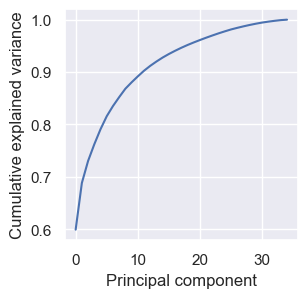

In [23]:
plt.figure(figsize=[3, 3])
plt.plot(np.cumsum(pca_vdem.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Cumulative explained variance')

PCA describes as many components as there are variables; the `n_components` parameter just means how many of those are kept.

How many components to keep?

In [24]:
eigenvalues_vdem = pd.Series(pca_vdem.explained_variance_)
eigenvalues_vdem

0     21.091486
1      3.136111
2      1.478822
3      1.120719
4      1.010512
5      0.872852
6      0.682074
7      0.599766
8      0.566905
9      0.428187
10     0.400349
11     0.379244
12     0.328642
13     0.290711
14     0.267402
15     0.237424
16     0.216444
17     0.201435
18     0.186512
19     0.172057
20     0.162428
21     0.156695
22     0.148973
23     0.143554
24     0.134087
25     0.127206
26     0.107247
27     0.100599
28     0.093405
29     0.084787
30     0.075907
31     0.062598
32     0.054331
33     0.047508
34     0.029653
dtype: float64

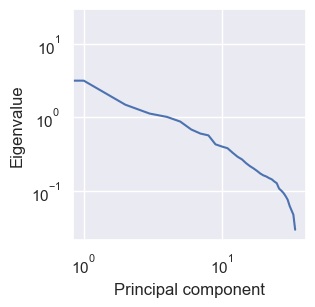

In [25]:
plt.figure(figsize=[3, 3])
plt.plot(eigenvalues_vdem)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.xscale('log')
plt.yscale('log')

In [26]:
pd.DataFrame(zip(X_vdem_pca[:, 0], X_vdem_pca[:, 1]), columns=['PC1', 'PC2'])

,PC1,PC2
0,-1.202027,-0.677605
1,-2.341024,-0.377533
2,-6.869927,1.128137
3,-7.507582,1.587825
4,-2.319518,-1.429725
...,...,...
174,-1.116092,-1.958971
175,-3.398636,-1.098114
176,5.309095,5.170591
177,0.612202,-0.285823


In [27]:
vdem_pc.head()

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,...,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31,PC 32,PC 33,PC 34
Mexico,-1.202027,-0.677605,-1.368239,0.303156,-1.430489,0.911451,0.048631,-0.427252,0.455746,1.393623,...,-0.277330,-0.232740,0.262911,-0.287686,0.443250,0.079864,-0.037155,-0.339040,0.013999,0.354266
Suriname,-2.341024,-0.377533,-0.482024,-0.918079,-0.215817,0.929522,-0.516014,0.740485,-0.287481,0.057980,...,-0.048032,-0.040700,0.001150,0.572153,-0.151856,0.045617,0.012967,0.247743,0.164254,-0.109257
Sweden,-6.869927,1.128137,0.079082,0.317767,0.492971,-0.419354,-0.070675,-1.206362,-1.230085,0.048084,...,-0.027805,0.024394,0.285571,-0.093687,0.372903,-0.150315,-0.220575,-0.012888,-0.178579,-0.341230
Switzerland,-7.507582,1.587825,1.071130,0.880006,-0.766096,-0.223308,-0.136888,0.082895,-0.218734,-0.543413,...,-0.044387,0.177587,0.057451,0.412269,0.662812,0.028931,0.149371,-0.145301,0.024361,-0.078439
Ghana,-2.319518,-1.429725,-0.888167,-0.710036,0.089036,0.320192,-1.549043,1.091807,0.259908,-0.302106,...,-0.497585,0.206129,-0.134344,0.067117,0.542148,0.353516,-0.155180,-0.046933,-0.295825,0.353088


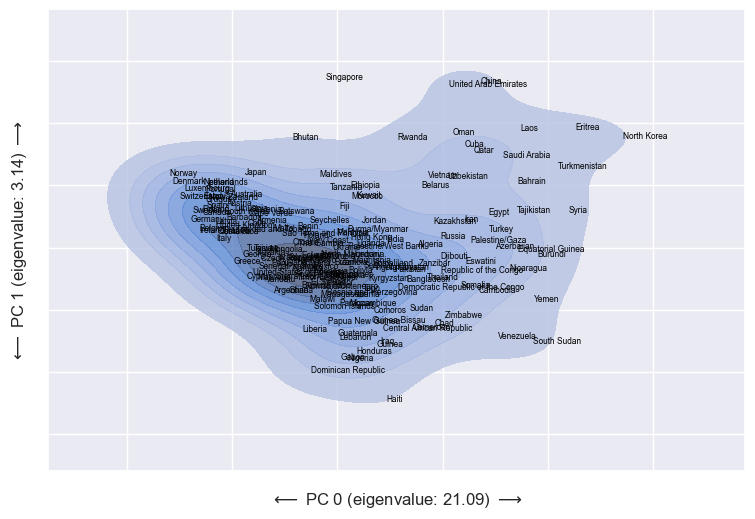

In [28]:
plt.figure(figsize=[9, 6])
ax = sns.kdeplot(data=vdem_pc, x='PC 0', y='PC 1', alpha=.8, fill=True)
for i, country in enumerate(vdem_pc.index):
    ax.text(
        x = vdem_pc['PC 0'][i], 
        y = vdem_pc['PC 1'][i], 
        s = country, 
        horizontalalignment = 'left', 
        size = 6, 
        color = 'black', 
        weight = 'normal'
    )
ax.set(xticklabels=[], yticklabels=[])
ax.set(
    xlabel = f'$\longleftarrow$ PC 0 (eigenvalue: {np.round(eigenvalues_vdem.loc[0], 2)}) $\longrightarrow$', 
    ylabel = f'$\longleftarrow$ PC 1 (eigenvalue: {np.round(eigenvalues_vdem.loc[1], 2)}) $\longrightarrow$'
)
plt.show()

BOX: How is PCA related to FactorAnalysis?
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

BOX: Why is that machine learning?

### 8.1.2. Unstructured (text) data

Introduce other methods (Non-negative matrix factorization, Sparse PCA, Kernel PCA, Truncated Singular Value Decomposition aka LSI, Latent Dirichlet Allocation, etc.): https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

#### Latent Dirichlet Allocation (LDA)

Generative probabilistic model

Bayesian method

LDA vs. clustering self-trained word embeddings from session 6 (Hovy chapter 9.6)

Caveats

Data: the same corpus that was prepared in session 6

Shortly mention the sklearn LDA pipeline?

gensim for LDA (Hovy chapter 9.2)

BOX: Structural topic model: Hovy chapter 9.4

## 8.2. Clustering

https://scikit-learn.org/stable/modules/clustering.html#clustering

### 8.2.1. Structured data

VDEM dataset

#### K-Means

How it works, when to use it

Silhouette score to find optimal number of clusters: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation and https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

def plot_vectors(vectors, title='VIZ', labels=None, dimensions=3):
    # set up graph
    fig = plt.figure(figsize=(3, 3))
    
    # create data frame
    df = pd.DataFrame(data={'x': vectors[:, 0], 'y': vectors[:, 1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
        #print(df.label)
    else:
        df['label'] = [''] * len(df)
    
    # assign colors to labels
    cm = plt.get_cmap('Set1') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i / n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
    
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:, 2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca()
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])
        
        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], df2['z'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=5)
        
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=5)
    
    else:
         raise NotImplementedError()
    
    plt.title(title)
    #plt.show()
    
    if dimensions == 3:
        ax.set_xlabel(f'$\longleftarrow$ PC 0 $\longrightarrow$')
        ax.set_ylabel(f'$\longleftarrow$ PC 1 $\longrightarrow$')
        ax.set_zlabel(f'$\longleftarrow$ PC 2 $\longrightarrow$')
    elif dimensions == 2:
        ax.set_xlabel(f'$\longleftarrow$ PC 0 (eigenvalue: {np.round(eigenvalues_vdem.loc[0], 2)}) $\longrightarrow$')
        ax.set_ylabel(f'$\longleftarrow$ PC 1 (eigenvalue: {np.round(eigenvalues_vdem.loc[1], 2)}) $\longrightarrow$')        
    else:
         raise NotImplementedError()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


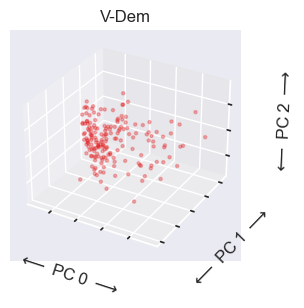

In [30]:
n_components = 3

plot_vectors(vectors=X_vdem_pca[:, :n_components], title='V-Dem', labels=None, dimensions=n_components)

BOX: Other methods for identifying optimal number of clusters; https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

#### Agglomarative clustering

How it works, when to use it

Silhouette score from the beginning

### 8.2.2. Unstructured (text) data

Mention available methods: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Introduce trick to use dimensionality reduction before (K-Means) clustering; https://datascience.stackexchange.com/questions/23591/clustering-algorithms-for-high-dimensional-binary-sparse-data

## 8.3. Association rule mining

https://sherbold.github.io/intro-to-data-science/05_Association-Rule-Mining.html

use http://rasbt.github.io/mlxtend/?

Describe associations for TweetsCOV19 tweets

## Commented references

### Recommended textbooks

Hovy, D. (2020). *Text Analysis in Python for Social Scientists: Discovery and Exploration*. Cambridge University Press. https://doi.org/10.1017/9781108873352. *ADD COMMENT*

### Other cited references

...

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: ...

Contributors: ...

Acknowledgements: ...

Version date: XX. February 2023

License: ...
</div>

#### Notes to be removed before publication

- ...